In [3]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
current_year = datetime.now().year

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Timmy\AppData\Roaming\nltk_data...


In [96]:
df = pd.read_csv('df_nmf.csv', index_col = False)

In [97]:
df['Review'].isna().sum()

0

In [98]:
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

df['Sentiment Score'] = df['Review'].apply(get_sentiment_score)

<Axes: >

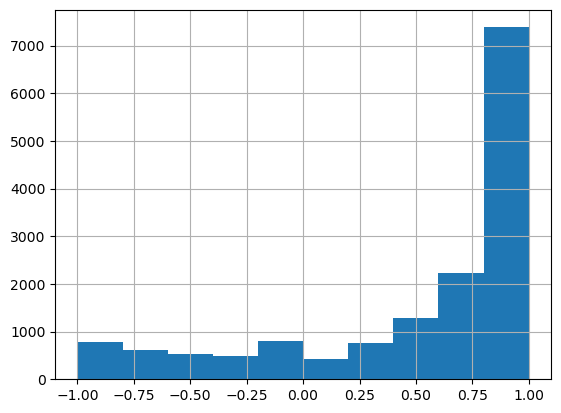

In [99]:
df['Sentiment Score'].hist()

<Axes: >

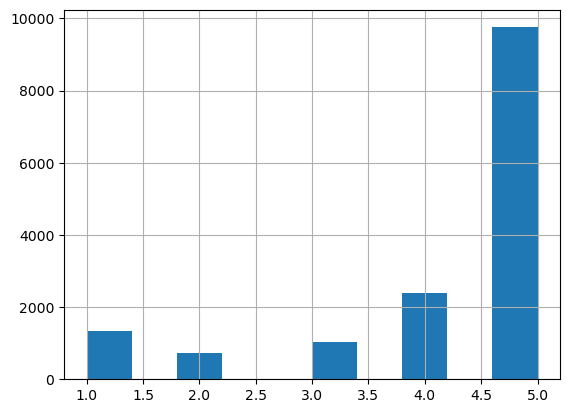

In [100]:
df['Rating'].hist()

looks like the distributions are relatively similar, main issue is that 5s will dominate, so will weight the less sentiments higher

In [101]:
df.columns

Index(['Unnamed: 0', 'id', 'Car Brand', 'Car Model', 'Year', 'Review',
       'Rating', 'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score'],
      dtype='object')

In [102]:
83591469.98218836**0.5

9142.837086057498

<Axes: >

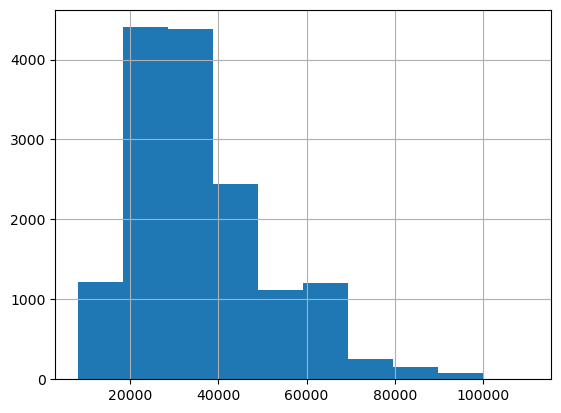

In [103]:
df['Average MSRP Price ($)'].hist()

In [104]:
# https://www.kbb.com/car-depreciation/
# fits exponential decay
from datetime import datetime
import numpy as np

def dep_value(msrp, year):
    age = current_year - year
    decay_constant = 0.163#constant using data from kbb, v close fit
    depreciated_value = msrp * np.exp(-decay_constant * age)
    
    return depreciated_value

def apply_dep(row):
    msrp = row['Average MSRP Price ($)']
    year = row['Year']
    return dep_value(msrp, year)

df['Depreciated Value'] = df.apply(apply_dep, axis=1)


In [105]:
#df.to_csv('final_cleaned.csv')

In [11]:
df = pd.read_csv('final_cleaned.csv', index_col = False).drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])
df.to_csv('final_cleaned.csv', in)

,id,Car Brand,Car Model,Year,Review,Rating,Value Rating,Performance Rating,Quality Rating,Comfort Rating,...,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Sentiment Score,Depreciated Value
0,0,honda,accord,2010,I've driven my LX over 13 years and the only t...,5.0,5.0,5.0,5.0,5.0,...,0.005305,0.047984,0.029611,0.000000,0.001949,0.000000,0.000000,0.002610,0.7650,2563.990450
1,1,honda,accord,2010,I have this car for 10 years have given me no ...,5.0,5.0,5.0,5.0,5.0,...,0.000000,0.068394,0.000000,0.000000,0.000140,0.000000,0.000000,0.000000,0.0772,2563.990450
2,2,honda,accord,2010,"My 2012 Honda Accord is great, It handles grea...",5.0,4.0,5.0,5.0,5.0,...,0.001163,0.055421,0.017086,0.000000,0.000000,0.008472,0.000000,0.000000,0.9793,2563.990450
3,3,honda,accord,2010,My sibling has this car. I may be a computer p...,5.0,5.0,5.0,5.0,5.0,...,0.048712,0.000348,0.000000,0.000000,0.052338,0.000000,0.000000,0.000000,0.8513,2563.990450
4,4,honda,accord,2010,"I've had this car for 7 years, it's dependable...",5.0,5.0,5.0,5.0,5.0,...,0.002760,0.008760,0.021036,0.001586,0.047316,0.001752,0.001899,0.004313,0.6682,2563.990450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15255,15261,mercedes-benz,a-class,2019,I just traded in my 2016 Mercedes GLA 250 for ...,5.0,5.0,5.0,5.0,5.0,...,0.000000,0.012522,0.002732,0.000000,0.000000,0.002009,0.000000,0.000000,0.9358,15268.843597
15256,15262,mercedes-benz,a-class,2019,"Great car, fun to drive and very quick. I had ...",5.0,4.5,4.0,5.0,4.5,...,0.000000,0.000000,0.000000,0.000000,0.037139,0.000000,0.000000,0.147676,0.9674,15268.843597
15257,15263,mercedes-benz,a-class,2019,Awesome car. Really smooth drive satisfying lo...,5.0,5.0,3.0,5.0,3.0,...,0.001305,0.000025,0.014332,0.000000,0.003232,0.000000,0.000000,0.017892,0.9713,15268.843597
15258,15264,mercedes-benz,a-class,2019,I got this car just because I have always boug...,1.0,2.0,1.0,2.0,1.0,...,0.000000,0.024854,0.000000,0.000000,0.001032,0.000000,0.000000,0.000000,0.8020,15268.843597
